In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./model_data.csv")

In [3]:
df.shape

(181374, 10)

In [4]:
df.head()

,Unnamed: 0,parent_category,sub_category,days,backers_count,pledged_amt,converted_pledged_amt,goal,country,state
0,0,Dance,None,30,34,2638.0,2638.0,2500,US,successful
1,1,Technology,Hardware,30,83,242831.0,30940.0,40000,HK,successful
2,2,Theater,Musical,31,110,11345.0,11345.0,10000,US,successful
3,3,Theater,Plays,30,14,826.0,826.0,700,US,successful
4,4,Theater,Musical,38,23,615.0,833.0,600,GB,successful


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181374 entries, 0 to 181373
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             181374 non-null  int64  
 1   parent_category        181374 non-null  object 
 2   sub_category           181374 non-null  object 
 3   days                   181374 non-null  int64  
 4   backers_count          181374 non-null  int64  
 5   pledged_amt            181374 non-null  float64
 6   converted_pledged_amt  181374 non-null  float64
 7   goal                   181374 non-null  int64  
 8   country                181374 non-null  object 
 9   state                  181374 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 13.8+ MB


In [6]:
# Convert label(state) into 0,1
labels = {"successful":1, "failed":0}
df["state"] = df["state"].map(labels)

In [7]:
df.head()

,Unnamed: 0,parent_category,sub_category,days,backers_count,pledged_amt,converted_pledged_amt,goal,country,state
0,0,Dance,None,30,34,2638.0,2638.0,2500,US,1
1,1,Technology,Hardware,30,83,242831.0,30940.0,40000,HK,1
2,2,Theater,Musical,31,110,11345.0,11345.0,10000,US,1
3,3,Theater,Plays,30,14,826.0,826.0,700,US,1
4,4,Theater,Musical,38,23,615.0,833.0,600,GB,1


In [8]:
df["state"].unique()

array([1, 0])

In [9]:
def freq_encoding(df,col):
  freq = df[col].value_counts(normalize=True)
  # Map the freq to df
  encoded_col_name = col+"_encoded"
  df[encoded_col_name] = df[col].map(freq)
  df = df.drop(col,axis=1)
  return df

In [10]:
# Using frequency encoding for converting categorical values into numerical
cols = ["country","parent_category","sub_category"]
for col in cols:
  df = freq_encoding(df,col)
print("Completed Freq Encoding")

Completed Freq Encoding


In [11]:
df.head()

,Unnamed: 0,days,backers_count,pledged_amt,converted_pledged_amt,goal,state,country_encoded,parent_category_encoded,sub_category_encoded
0,0,30,34,2638.0,2638.0,2500,1,0.670851,0.016557,0.026139
1,1,30,83,242831.0,30940.0,40000,1,0.010084,0.103890,0.011870
2,2,31,110,11345.0,11345.0,10000,1,0.670851,0.029955,0.006324
3,3,30,14,826.0,826.0,700,1,0.670851,0.029955,0.009709
4,4,38,23,615.0,833.0,600,1,0.114686,0.029955,0.006324


In [12]:
df = df.drop('Unnamed: 0',axis=1)

In [13]:
df.shape

(181374, 9)

In [14]:
df.head()

,days,backers_count,pledged_amt,converted_pledged_amt,goal,state,country_encoded,parent_category_encoded,sub_category_encoded
0,30,34,2638.0,2638.0,2500,1,0.670851,0.016557,0.026139
1,30,83,242831.0,30940.0,40000,1,0.010084,0.103890,0.011870
2,31,110,11345.0,11345.0,10000,1,0.670851,0.029955,0.006324
3,30,14,826.0,826.0,700,1,0.670851,0.029955,0.009709
4,38,23,615.0,833.0,600,1,0.114686,0.029955,0.006324


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181374 entries, 0 to 181373
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   days                     181374 non-null  int64  
 1   backers_count            181374 non-null  int64  
 2   pledged_amt              181374 non-null  float64
 3   converted_pledged_amt    181374 non-null  float64
 4   goal                     181374 non-null  int64  
 5   state                    181374 non-null  int64  
 6   country_encoded          181374 non-null  float64
 7   parent_category_encoded  181374 non-null  float64
 8   sub_category_encoded     181374 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 12.5 MB


In [16]:
df.columns

Index(['days', 'backers_count', 'pledged_amt', 'converted_pledged_amt', 'goal',
       'state', 'country_encoded', 'parent_category_encoded',
       'sub_category_encoded'],
      dtype='object')

In [17]:
# Rearranging the columns
df = df[['parent_category_encoded',
       'sub_category_encoded','country_encoded', 'days', 'backers_count', 'pledged_amt', 'converted_pledged_amt', 'goal', 'state']]

In [18]:
df.head()

,parent_category_encoded,sub_category_encoded,country_encoded,days,backers_count,pledged_amt,converted_pledged_amt,goal,state
0,0.016557,0.026139,0.670851,30,34,2638.0,2638.0,2500,1
1,0.103890,0.011870,0.010084,30,83,242831.0,30940.0,40000,1
2,0.029955,0.006324,0.670851,31,110,11345.0,11345.0,10000,1
3,0.029955,0.009709,0.670851,30,14,826.0,826.0,700,1
4,0.029955,0.006324,0.114686,38,23,615.0,833.0,600,1


In [19]:
df.describe()

,parent_category_encoded,sub_category_encoded,country_encoded,days,backers_count,pledged_amt,converted_pledged_amt,goal,state
count,181374.000000,181374.000000,181374.000000,181374.000000,181374.000000,1.813740e+05,1.813740e+05,1.813740e+05,181374.000000
mean,0.091314,0.010155,0.467665,33.380429,139.429472,3.140333e+04,1.479073e+04,5.125774e+04,0.596739
std,0.039881,0.004648,0.291291,12.526310,910.073954,5.127969e+05,1.476883e+05,1.149611e+06,0.490554
min,0.016557,0.000077,0.000221,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.050211,0.006952,0.114686,30.000000,4.000000,1.560000e+02,1.500000e+02,1.500000e+03,0.000000
50%,0.103890,0.011766,0.670851,30.000000,29.000000,1.948500e+03,1.825000e+03,5.000000e+03,1.000000
75%,0.138046,0.012438,0.670851,36.000000,93.000000,8.098000e+03,7.430000e+03,1.500000e+04,1.000000
max,0.139684,0.026139,0.670851,120.000000,185341.000000,6.477907e+07,4.175415e+07,1.000000e+08,1.000000


## Creating a Model
- **K-Nearest Neighbors (KNN)** : a simple classification algorithm, where K refers to the square root of the number of training records.
- **Logistic Regression** : a model with an input variable (x) and an output variable (y), which is a discrete value of either 1 (yes) or 0 (no).
- **Naive Bayes** : a family of classifiers based on a simple Bayesian model that is comparatively fast and accurate. Bayesian theory explores the relationship between probability and possibility.
- **Support Vector Machines (SVMs)** : a model with associated learning algorithms that analyze data for classification. Also known as Support-Vector Networks

In [20]:
# Split the dataset
columns = list(df.columns)
X = df[columns[:-1]] # Features
y = df[columns[-1]] # Labels

In [21]:
X.shape, y.shape

((181374, 8), (181374,))

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.66
Accuracy of Logistic regression classifier on test set: 0.66


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.86


In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.58
Accuracy of GNB classifier on test set: 0.57


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

([<matplotlib.axis.XTick at 0x7d36e727aaa0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

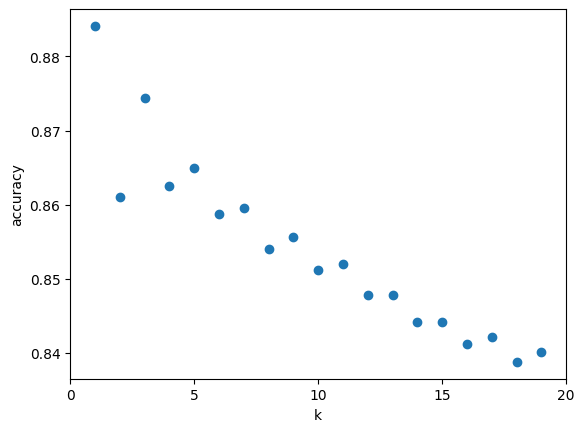

In [27]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])